# CSE-221710302056-S.Sai Mohit

Take any dataset of your choice from Kaggle or UCI and do the analysis on the data
<br>Load the dataset in a proper structure
<br>Get the number of rows and columns from the dataset
<br>Check how many categorical and numerical columns are there
<br>Categorical - object type
<br>Numerical - int,float
<br>Boolean - bool
<br>Get the basic descriptive information from the dataset  
<br>Get the frequency of the categories in all the columns of the dataset
<br>Check for the missing values and if found any visualize the missing values using seaborn, missingno libraries.
<br>Impute the missing values based on numerical and categorical
<br>Plot all the columns from the dataset; try to get some observations from the plot and write your inferences below the plots generated
<br>Select any column as output  from the dataset and plot the output column with some of the input columns, which are suitable from your data columns
<br>Encode the categorical columns using different kinds of encoding techniques from pandas and scikit-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("abalone.csv",names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


I took this data from UCI website and url is <a href="https://archive.ics.uci.edu/ml/datasets/Abalone">URL</a>

And THis is about the Abalone snail shells and we need to predict the no. of rings

Here we have Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Sell Weight,Rings

In this we need to predict the no. of rings

In [3]:
print("There are",df.shape[0],"rows and",df.shape[1],"columns")

There are 4177 rows and 9 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are no null values in the dataset

There are 1 object column i.e., 1 categorical column

There are 7 float64 columns and 1 int64 columns i.e., 8 numerical columns

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Length-->0.075 to 0.8

Diameter-->0.055 to 0.61

Height-->0 to 1.13

Whole Weight-->0.002 to 2.82

Shucked Weight-->0.001 to 1.48

Viscera weight-->0.0005 to 0.76

shell weight-->0.0015 to 1.005

Rings-->1 to 29

In [6]:
df.describe(include='O')

,Sex
count,4177
unique,3
top,M
freq,1528


In [7]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In Categorical column i.e., Sex column has 3 categories 
            
            Male
            Female
            Infant

Top one is Male Category

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221F2AFBE88>,
      dtype=object)

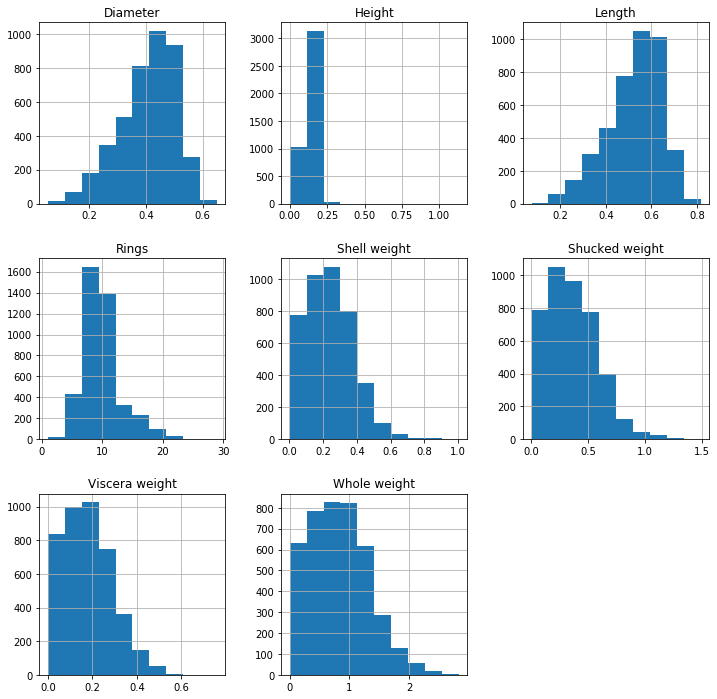

In [8]:
df.hist(figsize=(12,12))

In [9]:
df.isna().sum() #There are no null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
df[df['Height']==0] # I checked The only height column because in df.describe only height has min value 0

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In Height Columns There are 2 '0' Values 

Height will never equals to(==) Zero(0)

I'm replacing 0 values with the mean of height

In [11]:
df.replace(0.0,df.Height.mean(),inplace=True)

In [12]:
df[df['Height']==0.0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


Now all the 0 values removed from datafram.height

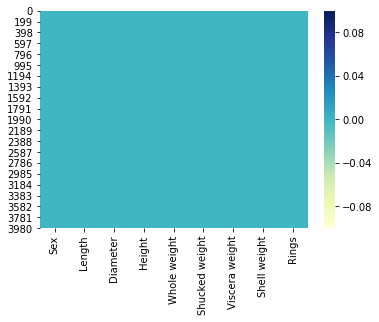

In [13]:
sns.heatmap(df.isna(),cmap='YlGnBu')

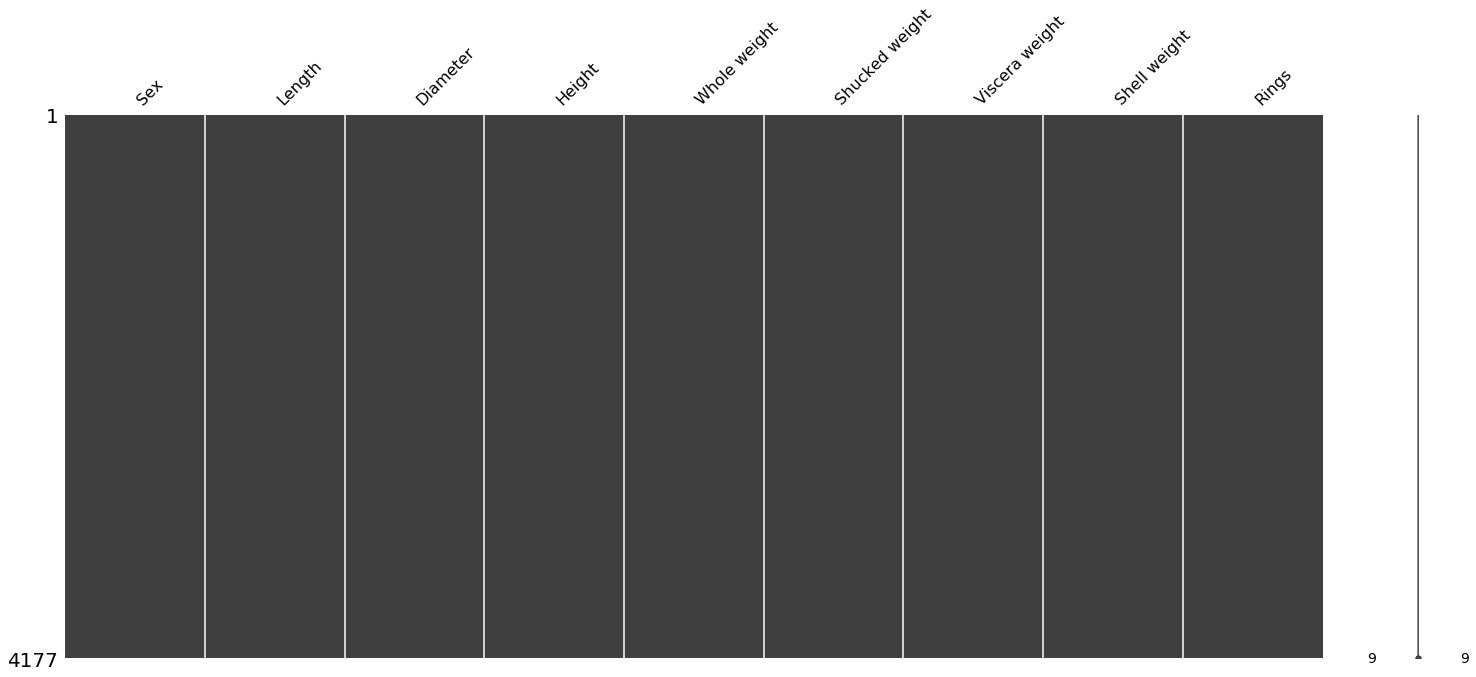

In [14]:
import missingno as msno
msno.matrix(df)

In [15]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
a=pd.DataFrame(le.fit_transform(df.Sex),columns=['Sex'])
df.drop('Sex',axis=1,inplace=True)

In [18]:
df=pd.concat([df,a],axis=1)

In [19]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss=StandardScaler()

In [22]:
df=pd.DataFrame(ss.fit_transform(df),columns=df.columns)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,-0.574558,-0.432149,-1.068874,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1.151980
1,-1.448986,-1.439929,-1.188748,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1.151980
2,0.050033,0.122130,-0.109881,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,-1.280690
3,-0.699476,-0.432149,-0.349630,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,1.151980
4,-1.615544,-1.540707,-1.428497,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,-0.064355
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609363,0.118813,0.047908,0.532900,0.073062,0.330765,-1.280690
4173,0.549706,0.323686,-0.109881,0.279929,0.358808,0.309362,0.155685,0.020571,1.151980
4174,0.632985,0.676409,1.568356,0.708212,0.748559,0.975413,0.496955,-0.289624,1.151980
4175,0.841182,0.777187,0.249741,0.541998,0.773341,0.733627,0.410739,0.020571,-1.280690


I used StandardScalar for the feature Sacling the dataframe

In [23]:
x=df.drop('Rings',axis=1)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
0,-0.574558,-0.432149,-1.068874,-0.641898,-0.607685,-0.726212,-0.638217,1.151980
1,-1.448986,-1.439929,-1.188748,-1.230277,-1.170910,-1.205221,-1.212987,1.151980
2,0.050033,0.122130,-0.109881,-0.309469,-0.463500,-0.356690,-0.207139,-1.280690
3,-0.699476,-0.432149,-0.349630,-0.637819,-0.648238,-0.607600,-0.602294,1.151980
4,-1.615544,-1.540707,-1.428497,-1.272086,-1.215968,-1.287337,-1.320757,-0.064355
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609363,0.118813,0.047908,0.532900,0.073062,-1.280690
4173,0.549706,0.323686,-0.109881,0.279929,0.358808,0.309362,0.155685,1.151980
4174,0.632985,0.676409,1.568356,0.708212,0.748559,0.975413,0.496955,1.151980
4175,0.841182,0.777187,0.249741,0.541998,0.773341,0.733627,0.410739,-1.280690


In [24]:
y=df.iloc[:,7:8]
y

,Rings
0,1.571544
1,-0.910013
2,-0.289624
3,0.020571
4,-0.910013
...,...
4172,0.330765
4173,0.020571
4174,-0.289624
4175,0.020571


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (3341, 8)
x_test: (836, 8)
y_train: (3341, 1)
y_test: (836, 1)


I have divided the whole data into train and test data where 80% is train data and 20% is test data with random state 2